# Glass Identification Dataset:


**Problem Statement:**

The dataset describes the chemical properties of glass and involves classifying samples of glass using their chemical properties as one of six classes. The dataset was credited to Vina Spiehler in 1987. The study of classification of types of glass was motivated by criminological investigation. At the scene of the crime, the glass left can be used as evidence...if it is correctly identified!

The chemical compositions are measured as the weight percent in corresponding oxide.

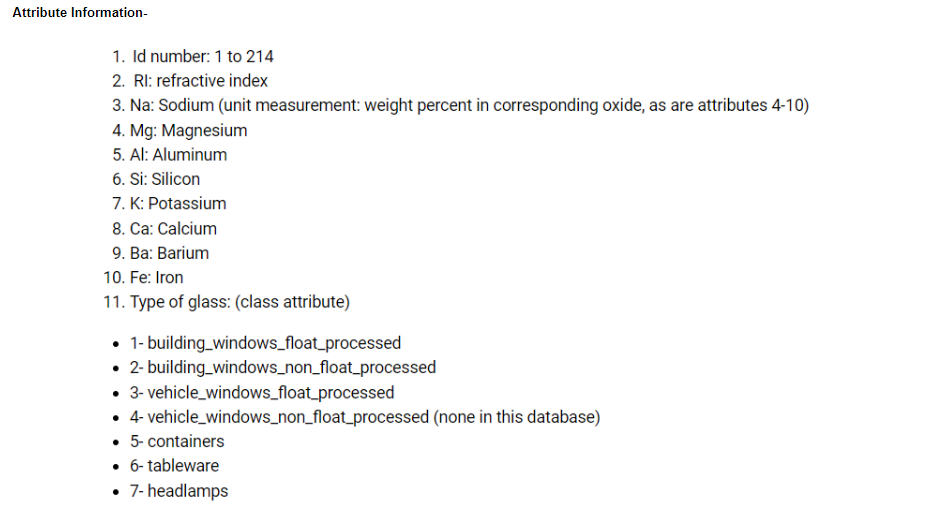

**Predict : Type of glass**

Downlaod Files:

- https://raw.githubusercontent.com/dsrscientist/dataset3/main/glass.csv
- https://github.com/dsrscientist/dataset3

### 1. Importing libraries and Dataset:

In [19]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import cross_val_score
from collections import Counter
from IPython.core.display import display, HTML
sns.set_style('darkgrid')

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_11280\2259254143.py:8: DeprecationWarning: Importing display from IPython.core.display is deprecated since IPython 7.14, please import from IPython display
  from IPython.core.display import display, HTML


In [20]:
dataset = pd.read_csv('glass.csv')
dataset.head()

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
0,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.0,0.0,1
1,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.0,0.0,1
2,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.0,0.0,1
3,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.0,0.0,1
4,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.0,0.0,1


In [21]:
# finding out the datatypes of the attributes.
dataset.dtypes

RI      float64
Na      float64
Mg      float64
Al      float64
Si      float64
K       float64
Ca      float64
Ba      float64
Fe      float64
Type      int64
dtype: object

In [22]:
# description of each of the attributes of the dataset.
dataset.describe()

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
count,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000
mean,1.518365,13.407850,2.684533,1.444907,72.650935,0.497056,8.956963,0.175047,0.057009,2.780374
std,0.003037,0.816604,1.442408,0.499270,0.774546,0.652192,1.423153,0.497219,0.097439,2.103739
min,1.511150,10.730000,0.000000,0.290000,69.810000,0.000000,5.430000,0.000000,0.000000,1.000000
25%,1.516522,12.907500,2.115000,1.190000,72.280000,0.122500,8.240000,0.000000,0.000000,1.000000
50%,1.517680,13.300000,3.480000,1.360000,72.790000,0.555000,8.600000,0.000000,0.000000,2.000000
75%,1.519157,13.825000,3.600000,1.630000,73.087500,0.610000,9.172500,0.000000,0.100000,3.000000
max,1.533930,17.380000,4.490000,3.500000,75.410000,6.210000,16.190000,3.150000,0.510000,7.000000


In [23]:
dataset['Type'].value_counts()

2    76
1    70
7    29
3    17
5    13
6     9
Name: Type, dtype: int64

### 2. Exploratory Data Analysis (EDA) and Visualization: 

C:\Users\Lenovo\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


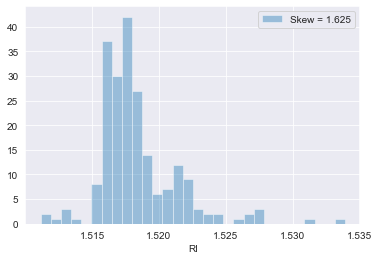

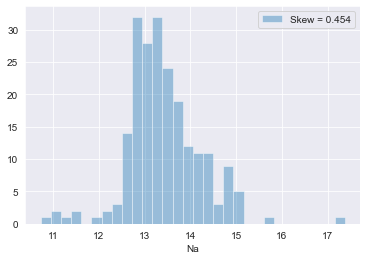

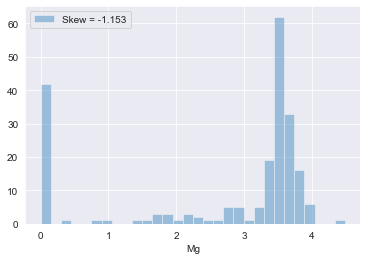

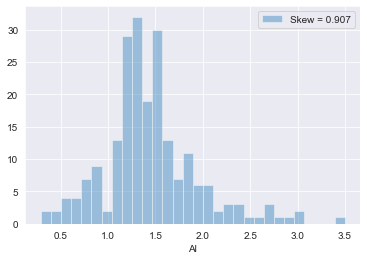

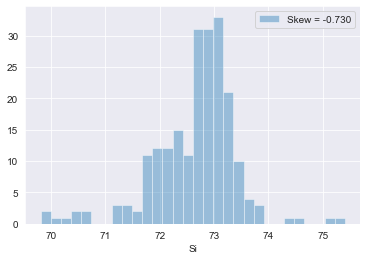

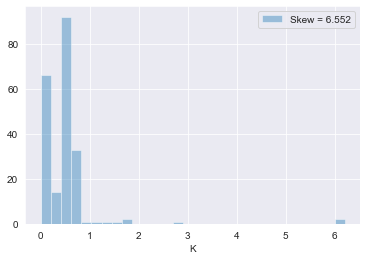

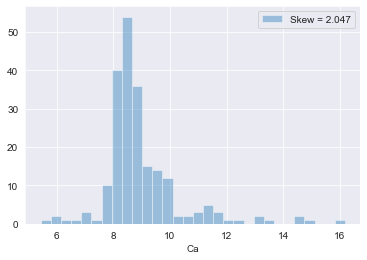

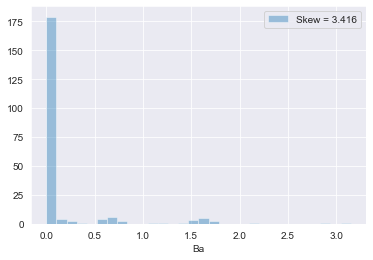

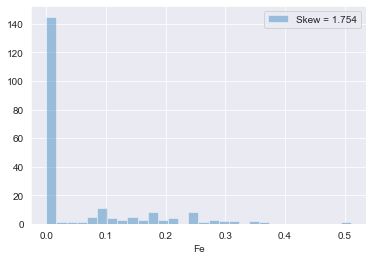

In [24]:
# Plotting and visualizing different attributes of the dataset using different plots.

features = dataset.columns[:-1].tolist()
for feat in features:
    skew = dataset[feat].skew()
    sns.distplot(dataset[feat], kde= False, label='Skew = %.3f' %(skew), bins=30)
    plt.legend(loc='best')
    plt.show()

* **Finding out the number of observations and outliers in the dataset.**

In [25]:
def outlier_hunt(dataset):
    """
    Takes a dataframe df of features and returns a list of the indices
    corresponding to the observations containing more than 2 outliers. 
    """
    outlier_indices = []
    
    # iterate over features(columns)
    for col in dataset.columns.tolist():
        # 1st quartile (25%)
        Q1 = np.percentile(dataset[col], 25)
        
        # 3rd quartile (75%)
        Q3 = np.percentile(dataset[col],75)
        
        # Interquartile rrange (IQR)
        IQR = Q3 - Q1
        
        # outlier step
        outlier_step = 1.5 * IQR
        
        # Determine a list of indices of outliers for feature col
        outlier_list_col = dataset[(dataset[col] < Q1 - outlier_step) | (dataset[col] > Q3 + outlier_step )].index
        
        # append the found outlier indices for col to the list of outlier indices 
        outlier_indices.extend(outlier_list_col)
        
    # select observations containing more than 2 outliers
    outlier_indices = Counter(outlier_indices)        
    multiple_outliers = list( k for k, v in outlier_indices.items() if v > 2 )
    
    return multiple_outliers   

print('The dataset contains %d observations with more than 2 outliers' %(len(outlier_hunt(dataset[features]))))   

The dataset contains 14 observations with more than 2 outliers


<Figure size 576x576 with 0 Axes>

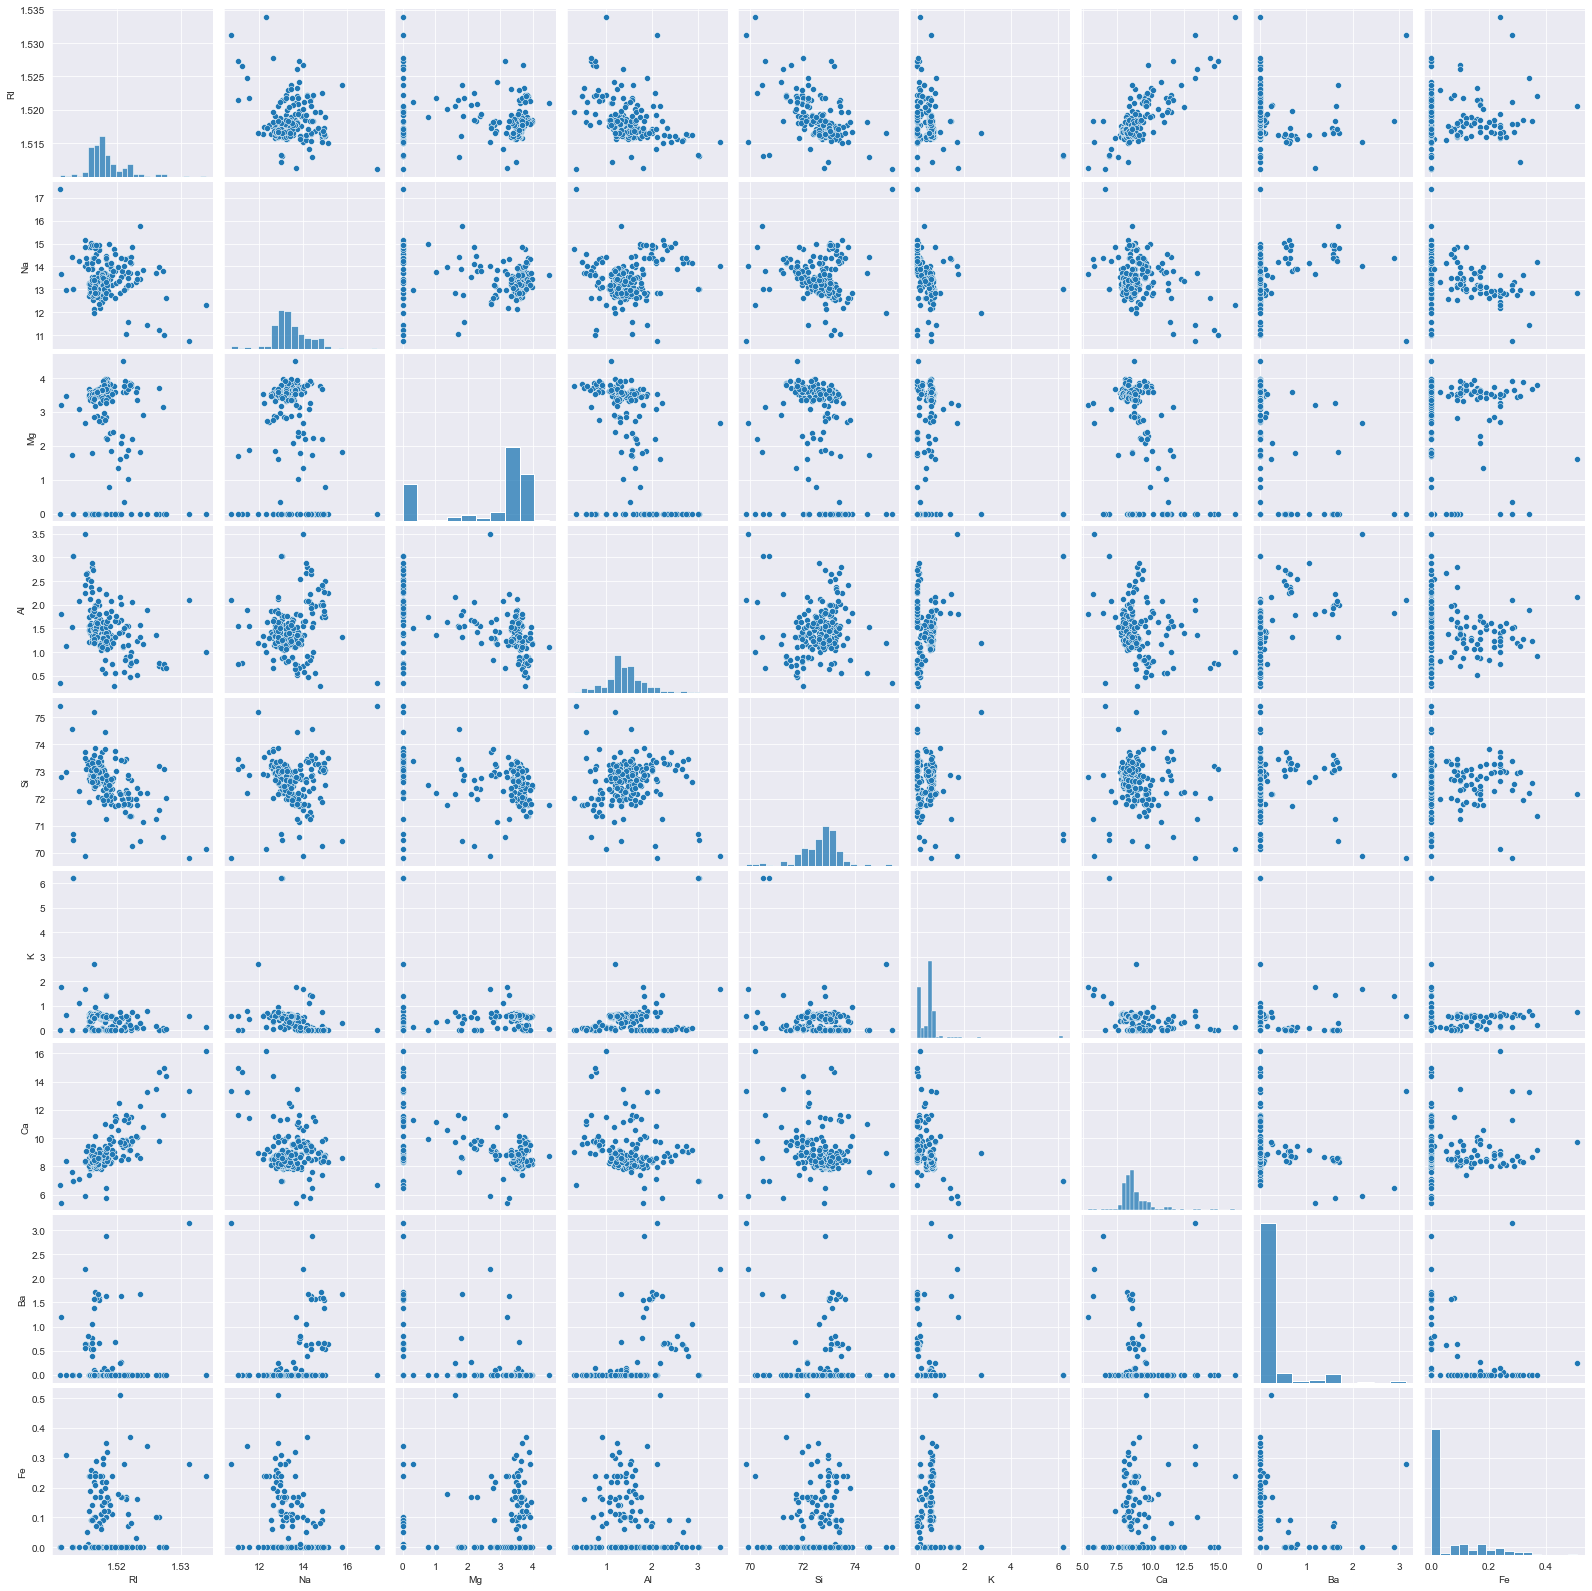

In [26]:
# plotting different features in the pairplot category
plt.figure(figsize=(8,8))
sns.pairplot(dataset[features],palette='coolwarm')
plt.show()

C:\Users\Lenovo\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


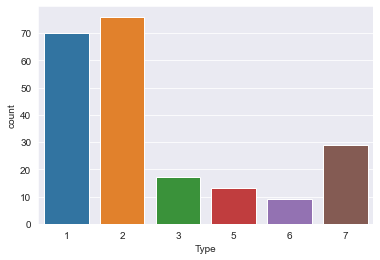

In [27]:
# showcasing the count plot which will count the types of the attributes.
sns.countplot(dataset['Type'])
plt.show()

In [28]:
# Finding out the Correlation of the attributes.

pd.DataFrame (dataset.corr().round(2))

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
RI,1.00,-0.19,-0.12,-0.41,-0.54,-0.29,0.81,-0.00,0.14,-0.16
Na,-0.19,1.00,-0.27,0.16,-0.07,-0.27,-0.28,0.33,-0.24,0.50
Mg,-0.12,-0.27,1.00,-0.48,-0.17,0.01,-0.44,-0.49,0.08,-0.74
Al,-0.41,0.16,-0.48,1.00,-0.01,0.33,-0.26,0.48,-0.07,0.60
Si,-0.54,-0.07,-0.17,-0.01,1.00,-0.19,-0.21,-0.10,-0.09,0.15
K,-0.29,-0.27,0.01,0.33,-0.19,1.00,-0.32,-0.04,-0.01,-0.01
Ca,0.81,-0.28,-0.44,-0.26,-0.21,-0.32,1.00,-0.11,0.12,0.00
Ba,-0.00,0.33,-0.49,0.48,-0.10,-0.04,-0.11,1.00,-0.06,0.58
Fe,0.14,-0.24,0.08,-0.07,-0.09,-0.01,0.12,-0.06,1.00,-0.19
Type,-0.16,0.50,-0.74,0.60,0.15,-0.01,0.00,0.58,-0.19,1.00


### 3. Model Creation:

In [29]:
# Splitting the data into train and test data

X = dataset.drop('Type', axis = 1).values
y = dataset['Type'].values.reshape(-1,1)

In [30]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 42)

In [31]:
print("Shape of X_train: ",X_train.shape)
print("Shape of X_test: ", X_test.shape)
print("Shape of y_train: ",y_train.shape)
print("Shape of y_test",y_test.shape)

Shape of X_train:  (160, 9)
Shape of X_test:  (54, 9)
Shape of y_train:  (160, 1)
Shape of y_test (54, 1)


In [32]:
# Importing required libraries for the Model creation.

from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from time import time
from sklearn.metrics import f1_score
from os import path, makedirs, walk
from joblib import dump, load
import json
from sklearn import metrics

### A. Logistic Regression 

In [33]:
logReg = LogisticRegression(max_iter = 5000)

In [34]:
logReg.fit(X_train, y_train)

C:\Users\Lenovo\anaconda3\lib\site-packages\sklearn\utils\validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression(max_iter=5000)

In [35]:
logReg.score(X_train, y_train)

0.63125

In [36]:
logReg.score(X_test, y_test)

0.6481481481481481

In [37]:
y_pred_dt_test = logReg.predict(X_test)

In [38]:
print('Accuracy of Logistic Regression Model:' ,metrics.accuracy_score(y_test,y_pred_dt_test))

Accuracy of Logistic Regression Model: 0.6481481481481481


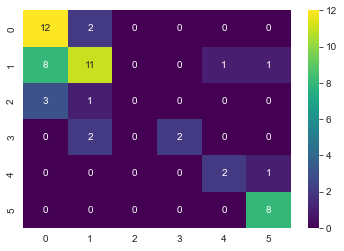

In [39]:
from sklearn.metrics import confusion_matrix
sns.heatmap(confusion_matrix(y_test, y_pred_dt_test), annot=True, cmap = 'viridis', fmt='.0f')
plt.show()

### B. Decision Tree Classifier Algorithm

In [40]:
dtc = DecisionTreeClassifier()

In [41]:
dtc.fit(X_train, y_train)

DecisionTreeClassifier()

In [42]:
dtc.score(X_train, y_train)

1.0

In [43]:
dtc.score(X_test, y_test)

0.6296296296296297

In [44]:
dtce = DecisionTreeClassifier(criterion = 'entropy')

In [45]:
dtce.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy')

In [46]:
dtce.score(X_train, y_train)

1.0

In [47]:
dtce.score(X_test, y_test)

0.7222222222222222

In [48]:
y_pred_dt_test = dtc.predict(X_test)

In [49]:
print('Accuracy of Decision Tree Classifier Model:' ,metrics.accuracy_score(y_test,y_pred_dt_test))

Accuracy of Decision Tree Classifier Model: 0.6296296296296297


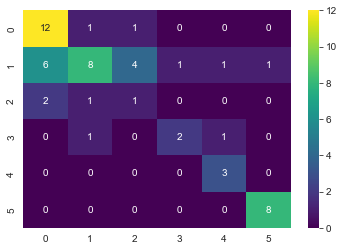

In [50]:
from sklearn.metrics import confusion_matrix
sns.heatmap(confusion_matrix(y_test, y_pred_dt_test), annot=True, cmap = 'viridis', fmt='.0f')
plt.show()

### C. Random Forest Classifier Algorithm

In [51]:
rfc = RandomForestClassifier()

In [52]:
rfc.fit(X_train, y_train)

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_11280\1542427849.py:1: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rfc.fit(X_train, y_train)


RandomForestClassifier()

In [53]:
rfc.score(X_train, y_train)

1.0

In [54]:
rfc.score(X_test, y_test)

0.8148148148148148

In [55]:
y_pred_dt_test = rfc.predict(X_test)

In [56]:
print('Accuracy of Random Forest Classifier Model:' ,metrics.accuracy_score(y_test,y_pred_dt_test))

Accuracy of Random Forest Classifier Model: 0.8148148148148148


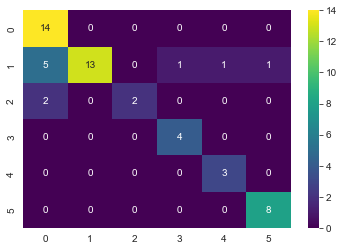

In [57]:
from sklearn.metrics import confusion_matrix
sns.heatmap(confusion_matrix(y_test, y_pred_dt_test), annot=True, cmap = 'viridis', fmt='.0f')
plt.show()

### D. K-Nearest Neighbours Algorithm

In [58]:
from sklearn.neighbors import KNeighborsClassifier  

In [59]:
classifier= KNeighborsClassifier(n_neighbors=5, metric='minkowski', p=2 )

In [60]:
classifier.fit(X_train, y_train)

C:\Users\Lenovo\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:207: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


KNeighborsClassifier()

In [61]:
classifier.score(X_train, y_train)

0.7375

In [62]:
classifier.score(X_test, y_test)

0.6296296296296297

In [63]:
y_pred_dt_test = classifier.predict(X_test)

In [64]:
print('Accuracy of KNN Classifier Model:' ,metrics.accuracy_score(y_test,y_pred_dt_test))

Accuracy of KNN Classifier Model: 0.6296296296296297


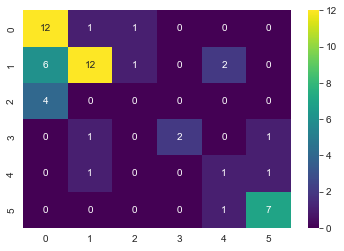

In [65]:
from sklearn.metrics import confusion_matrix
sns.heatmap(confusion_matrix(y_test, y_pred_dt_test), annot=True, cmap = 'viridis', fmt='.0f')
plt.show()

### E. Support Vector Machine Algorithm

In [66]:
classifier_svm = SVC()

In [67]:
classifier_svm.fit(X_train, y_train)

C:\Users\Lenovo\anaconda3\lib\site-packages\sklearn\utils\validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVC()

In [68]:
classifier_svm.score(X_train, y_train)

0.35

In [69]:
classifier_svm.score(X_test, y_test)

0.25925925925925924

In [70]:
y_pred_dt_test = classifier_svm.predict(X_test)

In [71]:
print('Accuracy of Support Vector Machine Model:' ,metrics.accuracy_score(y_test,y_pred_dt_test))

Accuracy of Support Vector Machine Model: 0.25925925925925924


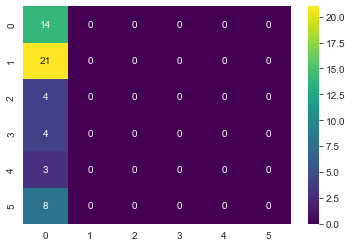

In [72]:
from sklearn.metrics import confusion_matrix
sns.heatmap(confusion_matrix(y_test, y_pred_dt_test), annot=True, cmap = 'viridis', fmt='.0f')
plt.show()

### F. Gradient Boosting Classifier

In [76]:
from sklearn.ensemble import GradientBoostingClassifier

In [77]:
gfc=GradientBoostingClassifier(n_estimators= 1000, max_leaf_nodes= 4, max_depth=None,random_state= 2,min_samples_split= 5)
gfc.fit(X_train,y_train)

C:\Users\Lenovo\anaconda3\lib\site-packages\sklearn\ensemble\_gb.py:570: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


GradientBoostingClassifier(max_depth=None, max_leaf_nodes=4,
                           min_samples_split=5, n_estimators=1000,
                           random_state=2)

In [78]:
gfc.score(X_train, y_train)

1.0

In [79]:
gfc.score(X_test, y_test)

0.8333333333333334

In [80]:
y_pred_dt_test = gfc.predict(X_test)

In [81]:
print('Accuracy of Gradient Boosting Classifier Model:' ,metrics.accuracy_score(y_test,y_pred_dt_test))

Accuracy of Gradient Boosting Classifier Model: 0.8333333333333334


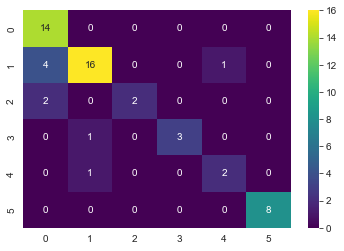

In [82]:
from sklearn.metrics import confusion_matrix
sns.heatmap(confusion_matrix(y_test, y_pred_dt_test), annot=True, cmap = 'viridis', fmt='.0f')
plt.show()

### Comparative analysis among the algorithms for this project

- Six machine learning algorithms have been tried and checked the accuracy of the models, based on the accuracy score of each of the models. The Best Fitted Model is: **Gradient Boosting Classifier.**

### Creating the model using Gradient Boosting Classifier

In [83]:
import pickle

In [84]:
filename = 'final_GB_glass_model.pkl'
pickle.dump(gfc, open(filename, 'wb'))

##### *Checking wether the model is working or, not!*

In [85]:
load_model = pickle.load(open(filename, 'rb'))
result = load_model.score(X_test, y_test)
print(result)

0.8333333333333334
